<a href="https://colab.research.google.com/github/Luciavaldera/Proyectos-Ingenier-a-Matematica-/blob/main/CAPSTONE_Mineria_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FINAL, CAPSTONE**


> GRUPO A03



>Julia Hernández Quintas, Pablo Mendieta Ruiz, Lucia Valdera Gayoso, Susana Villar Polvorosa

> ### Introducción


En este proyecto final, presentamos un profundo análisis de datos sobre una base llamada Employee Attrition, la cual contiene númerosos datos de trabajadores, incluidas características como el sector al que pertencenen, su estado civil, o su remuneración. Mediante el análisis y procesamiento de estos datos, buscamos estudiar como dichas características afectan a que el empleado decida abandonar la empresa, o por lo contrario continuar trabajando en ella.


Hemos utilizado un modelo de clasificación basado en -- que nos permite distinguir en función de las características del trabajador, si este tiene la intención de abandonar la empresa.

Esto enfoque resulta esencial para las empresas y compañías, dado que la pérdida de un talento significativo, supone un gran impacto directo en la operatividad de la empresa, y en consecuencia tambien en sus resultados y beneficios.

Lo que se pretende es poder llegar a tiempo, y tratar de evitar esa salida, valorando cambiar o mejorar las condiciones o malas experiencias, que estan llevando al trabajador a tomar esta decisión.

> ### Búsqueda y carga de la Base de Datos

Tratando de hallar una base de datos completa, con númerosas características de los empleados, así como la decisión de permanencia o salida de la empresa, hemos tomado la base:
Employee Attrition

In [ ]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d patelprashant/employee-attrition

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/patelprashant/employee-attrition
License(s): other
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 60.7MB/s]


In [ ]:
import zipfile
import pandas as pd

# Ruta al archivo ZIP descargado
archivo_zip = '/content/employee-attrition.zip'

# Lista para almacenar nombres de archivos dentro del ZIP
nombres_archivos = []

# Extraer archivos del ZIP
with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
    zip_file.extractall('/content/')  # Extraer archivos ZIP en el directorio especificado
    nombres_archivos = zip_file.namelist()  # Obtener nombres de archivos dentro del ZIP

# Suponiendo que hay un solo archivo CSV en el ZIP, podemos cargarlo directamente
if nombres_archivos:
    archivo_csv = [archivo for archivo in nombres_archivos if archivo.endswith('.csv')][0]

    # Leer el archivo CSV en un DataFrame de pandas
    df = pd.read_csv('/content/' + archivo_csv)

    # Visualizar las primeras filas del DataFrame para asegurarse de que se haya cargado correctamente
    # print(df.head())
else:
    print("No se encontraron archivos CSV dentro del ZIP.")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# _df_7.groupby('EducationField').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Traducción de los nombres de las variables
nombres_traducidos = {'Age': 'Edad','Attrition': 'Abandono','BusinessTravel': 'Viajes de Negocios','DailyRate': 'Tarifa Diaria','Department': 'Departamento','DistanceFromHome': 'Distancia Desde Casa','Education': 'Educación',
    'EducationField': 'Campo de Educación','EmployeeCount': 'Número de Empleados','EmployeeNumber': 'Número de Empleado','EnvironmentSatisfaction': 'Satisfacción con el Ambiente','Gender': 'Género',
    'HourlyRate': 'Tarifa por Hora','JobInvolvement': 'Involucramiento en el Trabajo','JobLevel': 'Nivel de Trabajo','JobRole': 'Rol en el Trabajo','JobSatisfaction': 'Satisfacción Laboral',
    'MaritalStatus': 'Estado Civil','MonthlyIncome': 'Ingreso Mensual','MonthlyRate': 'Tasa Mensual','NumCompaniesWorked': 'Número de Comp Trabajadas','Over18': 'Sobre 18','OverTime': 'Horas Extra',
    'PercentSalaryHike': 'Aumento Salarial porcentual','PerformanceRating': 'Calificación de Desempeno','RelationshipSatisfaction': 'Satisfacción en las Relaciones','StandardHours': 'Horas Estándar','StockOptionLevel': 'Nivel de Opciones sobre Acciones',
    'TotalWorkingYears': 'Total de Anyos Trabajados','TrainingTimesLastYear': 'Veces Entrenado el Ano Pasado','WorkLifeBalance': 'Equilibrio Entre Trabajo y Vida','YearsAtCompany': 'Anyos en la Empresa',
    'YearsInCurrentRole': 'Anyos en el Rol Actual','YearsSinceLastPromotion': 'Anyos Desde la Última Promoción','YearsWithCurrManager': 'Anyos con el Gerente Actual'
}

# Renombrar las columnas en el DataFrame
df.rename(columns=nombres_traducidos, inplace=True)


> ### Base de Datos

La base de datos elegida, es un conjunto de datos obtenidos de una encuesta a los trabajadores de IBM.

Esta empresa ha recopilador información sobre la permanencia o marcha de sus empleados, sus ingresos, antigúedad, sector, datos demógraficos etc.
Dicha base incluye un conjunto de 1470 datos de los empleados, con 35 variables (caraterísticas) diferentes, entre las que se encuentran las previamente mencionadas.

Hagamos una visión previa de algunos puntos de nuestra base de datos, observando primero si existen valores nulos, así como el tipo de cada atributo:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Edad                              1470 non-null   int64 
 1   Abandono                          1470 non-null   object
 2   Viajes de Negocios                1470 non-null   object
 3   Tarifa Diaria                     1470 non-null   int64 
 4   Departamento                      1470 non-null   object
 5   Distancia Desde Casa              1470 non-null   int64 
 6   Educación                         1470 non-null   int64 
 7   Campo de Educación                1470 non-null   object
 8   Número de Empleados               1470 non-null   int64 
 9   Número de Empleado                1470 non-null   int64 
 10  Satisfacción con el Ambiente      1470 non-null   int64 
 11  Género                            1470 non-null   object
 12  Tarifa por Hora     

A continuación, mostramos también algunos datos estadísticos relevantes sobre cada variable, que nos pueden ayudar a comprenderla mejor:

In [ ]:
df.describe()

,Edad,Tarifa Diaria,Distancia Desde Casa,Educación,Número de Empleados,Número de Empleado,Satisfacción con el Ambiente,Tarifa por Hora,Involucramiento en el Trabajo,Nivel de Trabajo,...,Satisfacción en las Relaciones,Horas Estándar,Nivel de Opciones sobre Acciones,Total de Anyos Trabajados,Veces Entrenado el Ano Pasado,Equilibrio Entre Trabajo y Vida,Anyos en la Empresa,Anyos en el Rol Actual,Anyos Desde la Última Promoción,Anyos con el Gerente Actual
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Con esta información estadística, podemos ver como la variable número de empleados, es constante, siendo su media 1 y su desviación estándar 0.

Lo mismo ocurre con las horas estándar, que tiene un valor medio, máximo y mínimo de 80, y una desviación estándar de 0, lo que nos hace ver que todos los valores son 80.

Esto nos lleva a determinar como primer paso del preprocesamiento de la base de datos, la eliminación de estas dos variables, ya que es evidente que al ser todos los valores iguales, no nos aporta ninguna información.

Mostramos las gráficas (histogramas) de las variables categóricas, para ver si alguna tiene una distribución o valores poco comunes, y también podemos deshacernos de ellas.

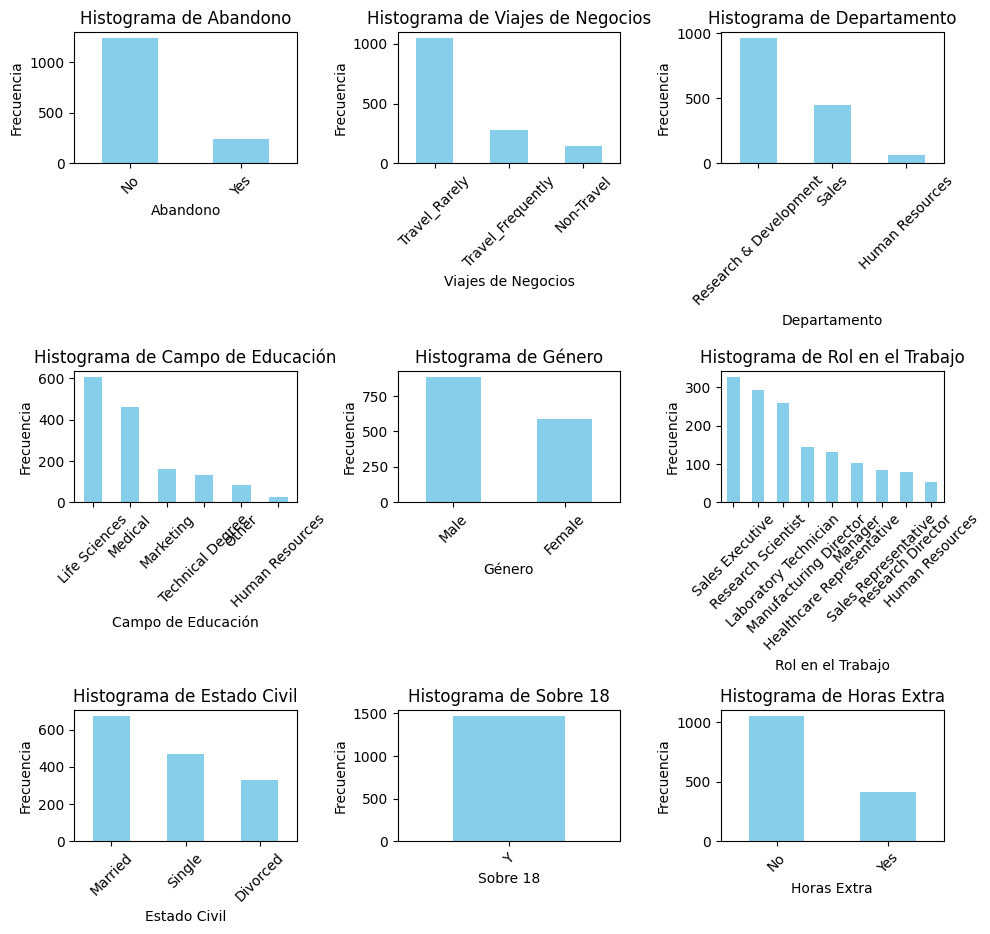

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

non_numeric_columns = [col for col in df.columns if df[col].dtype == 'object']

# Crear la figura con subplots para los histogramas
fig, axes = plt.subplots(4, 3, figsize=(10, 12))  # Ajusta el tamaño de la cuadrícula según sea necesario
axes = axes.flatten()

# Crear histogramas para las variables categóricas o no numéricas
for i, col in enumerate(non_numeric_columns):
    df[col].value_counts().plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Eliminar los subplots vacíos si hay menos subplots que espacios en la cuadrícula
for j in range(len(non_numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre las subtramas y mostrar el gráfico
plt.tight_layout()
plt.show()

Con estos graficos, vemos como la variable Over 18, tiene una única categoría, ya que todos los trabajadores de los cuales se recoge información en nuestra base de datos, tienen un edad superior a 18 años.

Gracias a esta visualización, podemos ver que dicha variable no va aportar ninguna información ni ayuda en nuestro estudio, pues todos los valores son iguales, por lo que procederemos a eliminarla también durante el preprocesamiento.

> ### Preprocesamiento de la Base de Datos

*ELIMINACIÓN DE VARIABLES SIN INFORMACIÓN*

Como bien hemos analizado, hay dos variables que tienen el mismo valor para todos sus registros, y que por tanto de forma evidente no nos aportan nada de información.

Procedemos a elimiinar dichas variables, que son nº empleados, y horas estándar como primer paso del preprocesamiento:

In [ ]:
df = df.drop(columns=['Número de Empleados', 'Horas Estándar','Sobre 18'])

*NORMALIZACIÓN DE LOS DATOS*

El primer paso que vamos a hacer, para tratar nuestra base de datos, y dejarla lista para aplicar distintos modelos de minería de datos, va a ser normalizar los mismos.

Con este paso, conseguiremos escalar los valores de las variables númericas a un rango común, en este caso entre [0,1]. De esta manera, nos aseguramos que todas las variables contribuyen de forma equitativa a los modelos, evitando de esta manera que las variables más grandes, sean las que dominen dicho proceso.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas númericas, para normalizarlas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

*ONE HOT ENCODING*

Emplearemos esta técnica para convertir nuestras variables categóricas, en formato númerico. Con esto permitiremos que nuestros modelos de aprendizaje (especialmente regresión logística) puedan procesarlos correctamente.

Este método consiste en asignar a cada valor, un vector de 0, con un único uno en la posición que represente dicha categoría, conseguiendo así que cada categoría sea tratada de forma independiente, sin incluir ningún orden.


In [ ]:
from keras.utils import to_categorical

# Identificar las columnas de tipo 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
for column in categorical_columns:
    df[column] = pd.Categorical(df[column])
    df[column] = df[column].cat.codes

*BUSQUEDA DE OUTLIERS*

A continuación utilizaremos una útil herramienta de visualización de datos, llamada box-plot o caja de bigotes habitualmente empleada para el análisis de otuliers.

Con ella, podremos ver si existe en nuestro dataset alguna variable con valores fuera de rango, y en caso de ser así consideraremos y justificaremos la decisión de mantenerlos, o despreciarlos.

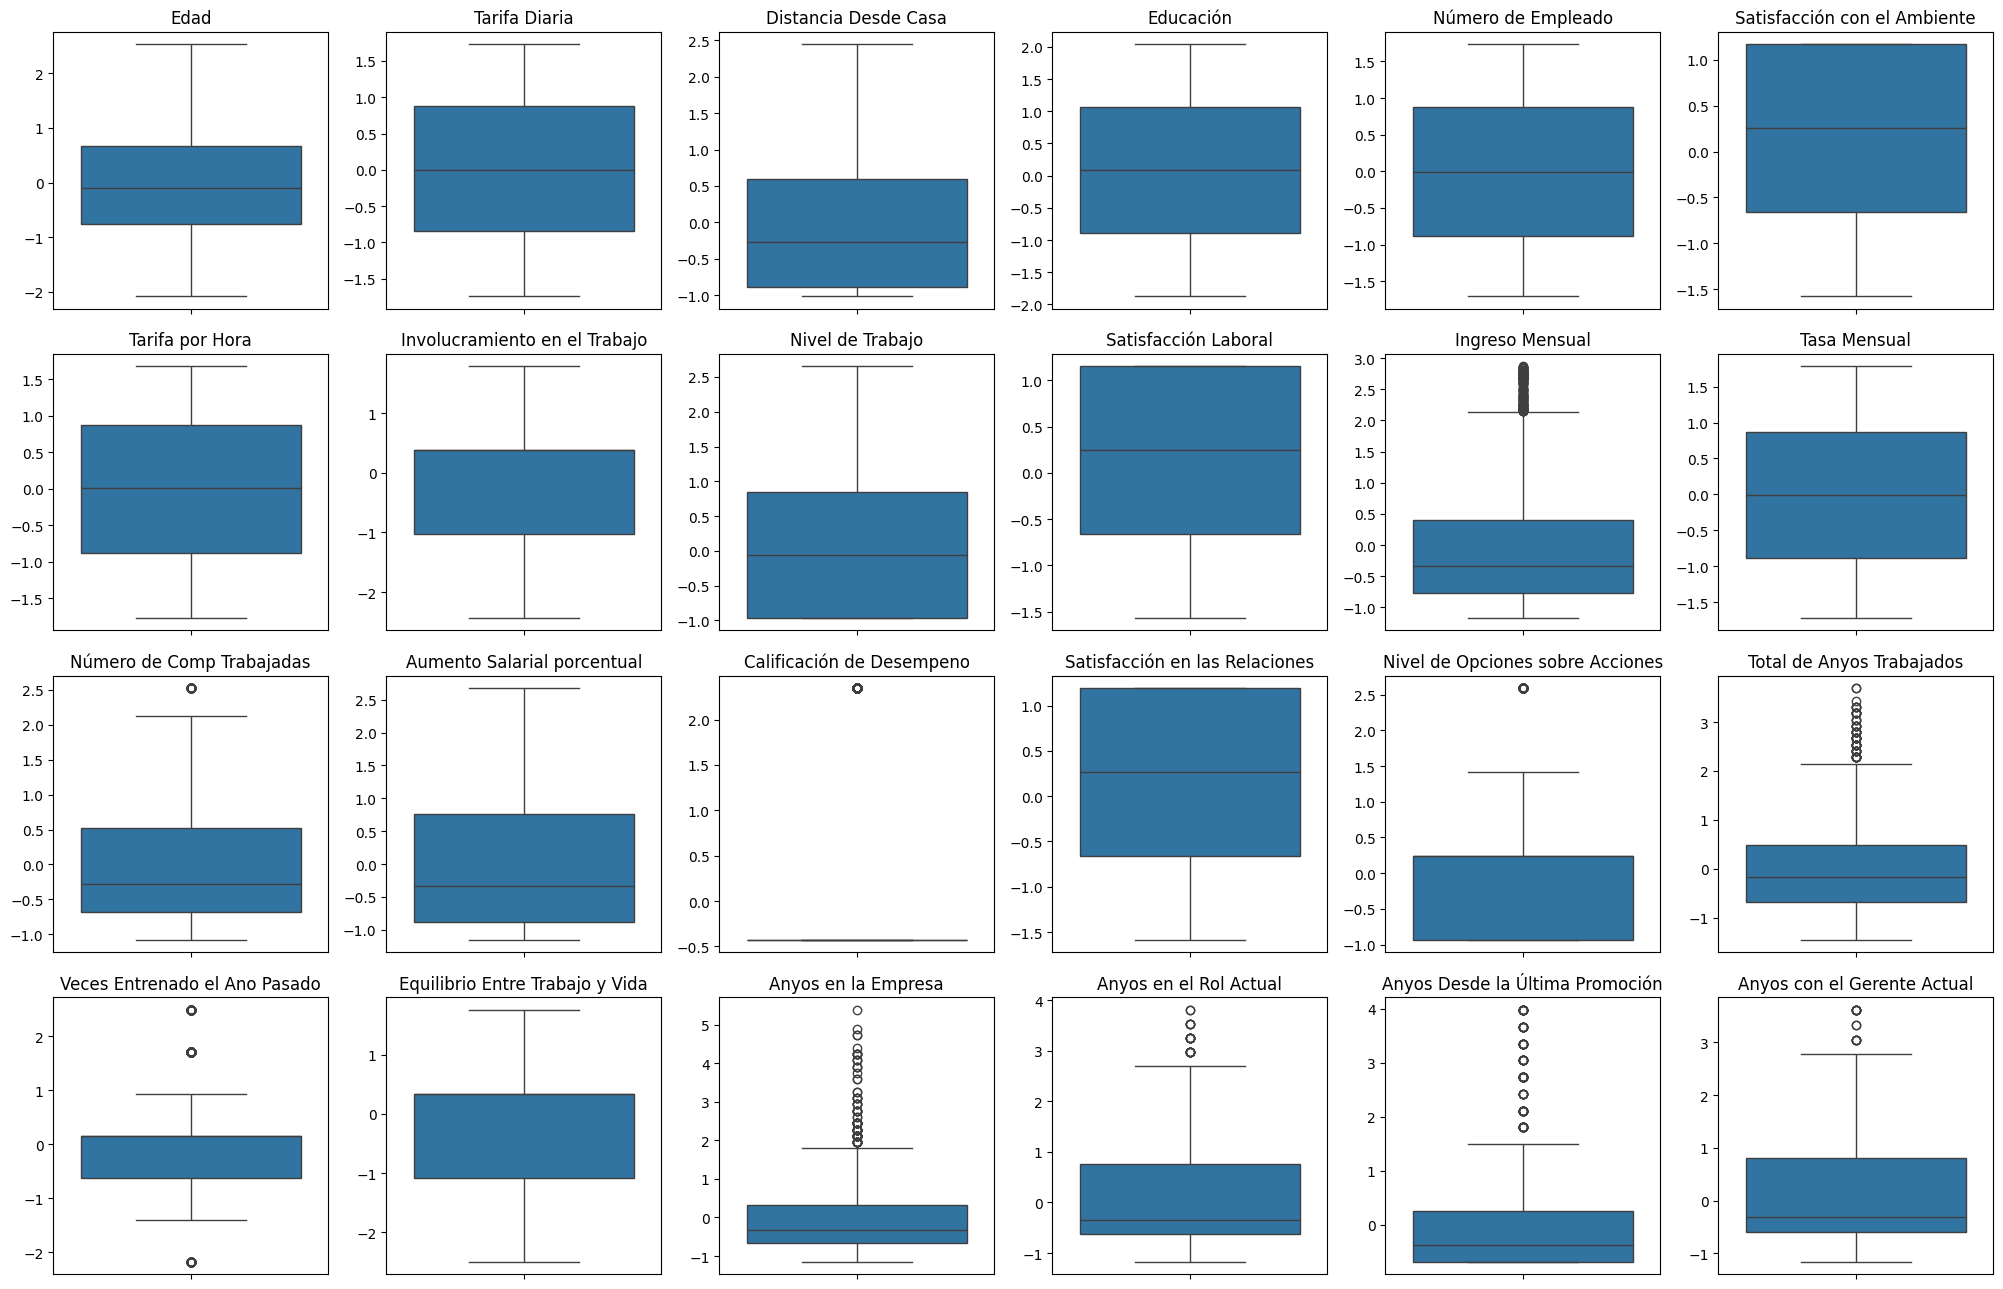

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las variables numéricas del DataFrame
variables = df.select_dtypes(include=['float64']).columns
num_variables = len(variables)

# Creamos la figura con subplots para los boxplots
fig, axes = plt.subplots(4, 6, figsize=(20, 13))
axes = axes.flatten()

# Creamos los gráficos de boxplot para cada variable
for i, variable in enumerate(variables):
    sns.boxplot(y=df[variable], ax=axes[i])
    axes[i].set_title(f'{variable}')
    axes[i].set_ylabel('')

# Si hay menos variables que subplots, deshabilitamos los subplots adicionales
for j in range(num_variables, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

A la hora de considerar si debemos eliminar, o mantenener los outliers, valoramos principalmente, si estos valores fuera de rango pueden ser causa de errores de medición, o si por lo contrario, son simples valores alejados del resto, pero válidos igualmente. Después debemos interpretar si, teniendo en cuenta el dominio del problema, estos datos son relevantes para nuestro estudio, o si por lo contrario a pesar de ser válidos conviene deshacerse de ellos.

En el caso de las 4 últimas variables: **años en la empresa**, **años en el rol actual**, **años desde la última promoción**, **años con el gerente actual**, junto con el **total de años trabajados**, todas ellas consideran mediciones en años,de distitnos temas. Todos los outliers, son superiories, es decir son empleados que destacan por llevar muchos más años que el resto. Consideramos que estos valores son importantes para nuestro estudio, ya que es lógico pensar que la monotonía de tanto tiempo en un mismo lugar, o con un mismo jefe, sea un incentivo para querer abandonar el trabajo. Es por ello que dichos valores se mantendrán durante el resto del estudio.

Lo mismo ocurre con el **ingreso mensual**, hay bastantes empleados con un salario bastante superior, pero el salario es una condición bastante importante al decidir abandonar o no una empresa, por lo que también mantendremos dichos valores.

En cuanto a las variables: **veces entrenadas**, **numero de compañías trabajadas**, y **nivel de opciones sobre acciones**, son tan pocos los valores que aparecen fuera de rango que quizá si que pudieran ser errores de medición, y de no serlo son casos muy aislados, por lo que decidimos eliminarlos.





In [ ]:
import pandas as pd

cuantiles = df[['Veces Entrenado el Ano Pasado', 'Nivel de Opciones sobre Acciones', 'Número de Comp Trabajadas']].quantile([0.25, 0.75])

IQR = cuantiles.diff().iloc[1]

# Definimos los límites para identificar outliers para cada variable
limite_inferior = (cuantiles.loc[0.25] - 1.5 * IQR).values
limite_superior = (cuantiles.loc[0.75] + 1.5 * IQR).values

# Filtra los datos para eliminar outliers para cada variable
for i, col in enumerate(['Veces Entrenado el Ano Pasado', 'Nivel de Opciones sobre Acciones', 'Número de Comp Trabajadas']):
    df = df[(df[col] > limite_inferior[i]) & (df[col] < limite_superior[i])]

# Muestra la forma del DataFrame después de eliminar outliers
print(df.shape)

(1117, 32)


Finalmente tenemos la variable **calificación de desempeño** que analizando el boxplot, vemos como todas los valores se mantienen en un mismo punto excepto algunos ouliters. Es algo poco habitual, así que la analizamos detenidamente viendo su distribución:

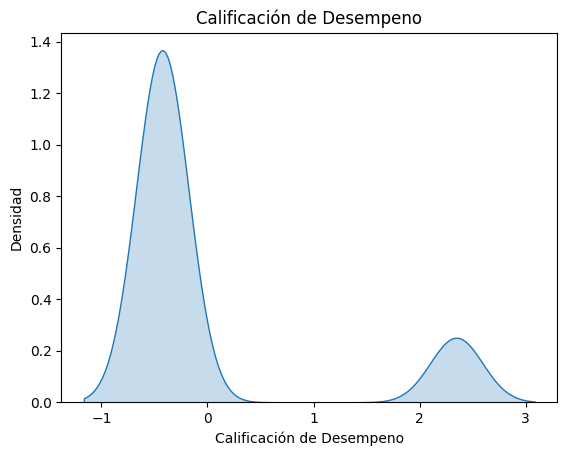

float64
[ 2.34615106 -0.42623002]


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar histograma de la variable diagnosis
sns.kdeplot(df['Calificación de Desempeno'], fill=True)
plt.title('Calificación de Desempeno')
plt.xlabel('Calificación de Desempeno')
plt.ylabel('Densidad')
plt.show()
plt.show()

# Imprimir el tipo de datos de la columna 'Calificación de Desempeño'
print(df['Calificación de Desempeno'].dtype)

# Mostrar los valores únicos de la columna 'Calificación de Desempeño'
print(df['Calificación de Desempeno'].unique())


Observando esto, vemos que dicha variable, es una variable categórica, cuya categoría son numeros enteros. Es por ellos que mostramos su boxplot, pero no consideramos outliers en ella.

*EQUILIBRIO DE LA VARIABLE ABANDONO*

En este último punto del preprocesamiento, pretendemos estudiar si la variable que queremos clasificar (abandono), está compensada, o si por lo contrario exsite un desequilibrio entre el número de muestras que abandonan y que no.

Para ello, mostramos un gráfico de barras de la variable, y en función de lo obtenido, valoramos si debemos o no ajustar:


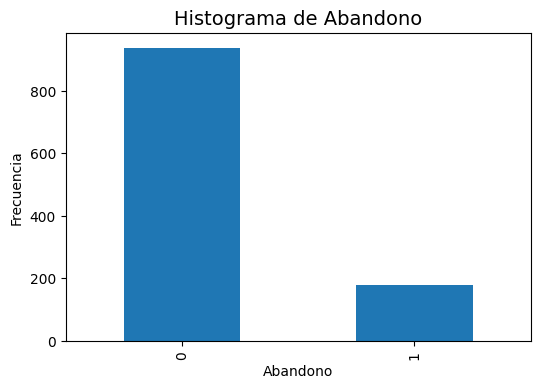

In [ ]:
# Mostrar histograma de la variable diagnosis
plt.figure(figsize=(6, 4))
df['Abandono'].value_counts().plot(kind='bar')
plt.title('Histograma de Abandono', fontsize=14)
plt.xlabel('Abandono')
plt.ylabel('Frecuencia')
plt.show()

Es evidente que dicha variable esta muy desequilibrada, lo que puede llevar a problemas en el modelo, y muy posiblemente a obtener una precisión más baja.

Para solucionar el desequilibrio de clases, vamos a emplear dos técnicas comunes: el sobremuestreo (oversampling) y SMOTE (Synthetic Minority Over-sampling Technique):

* Submuestreo aleatorio: con esta técnica vamos a duplicar aleatoriamente ejemplos de la clase minoritaria, buscando aumentar el número de muestras de la dicha clase, acercandose más a una cantidad similar a la de la clase opuesta.


* SMOTE (Synthetic Minority Over-sampling Technique): con SMOTE vamos a crear instancias sintéticas de la clase minoritaria mediante la interpolación entre instancias. Con esto buscamos aumentar el número de muestras de la dicha clase, acercandose más a una cantidad similar a la de la clase opuesta.

Apicando ambas técnicas, obtendremos un nuevo conjunto de datos equilibrado

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

prop = df['Abandono'].value_counts()[1] / 700
rus = RandomUnderSampler(sampling_strategy= prop,random_state=42)

X = df.drop(columns=['Abandono'])
y = df['Abandono']

X_resampled, y_resampled = rus.fit_resample(X, y)

# Crear un nuevo DataFrame con las muestras submuestreadas
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                           pd.DataFrame(y_resampled, columns=['Abandono'])], axis=1)

# Mostrar la distribución de clases después del submuestreo aleatorio
print("Distribución de clases después de RandomUnderSampler:", Counter(df_resampled['Abandono']))

Distribución de clases después de RandomUnderSampler: Counter({0: 700, 1: 179})


Como último paso, aumentamos la clase minoritaria son SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE

# Separamos características y variable objetivo
X = df_resampled.drop('Abandono', axis=1)
y = df_resampled['Abandono']

# Creamos una instancia de SMOTE
prop2 = 600 / df_resampled['Abandono'].value_counts()[0]
smote = SMOTE(sampling_strategy= prop2,random_state = 42)

# Aplicamos SMOTE para generar nuevas muestras
X_smote, y_smote = smote.fit_resample(X, y)

df_empleados = pd.concat([pd.DataFrame(X_smote, columns=X.columns),
                           pd.DataFrame(y_smote, columns=['Abandono'])], axis=1)

# Mostrar la distribución de clases después del submuestreo aleatorio
print("Distribución de clases después de RandomUnderSampler:", Counter(df_empleados['Abandono']))

Distribución de clases después de RandomUnderSampler: Counter({0: 700, 1: 600})


In [ ]:
# Volvemos a llamara a nuestros datos con el nombre original:
df = df_empleados
print(df.shape)

(1300, 32)


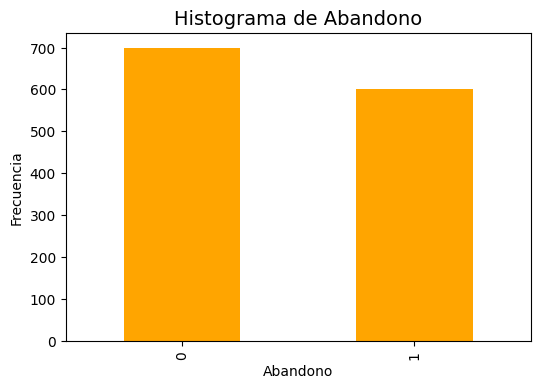

In [ ]:
# Mostrar histograma de la variable diagnosis
plt.figure(figsize=(6, 4))
df['Abandono'].value_counts().plot(kind='bar', color='orange')
plt.title('Histograma de Abandono', fontsize=14)
plt.xlabel('Abandono')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# print(df['Sobre 18'])

*CORRELACIÓN ENTRE VARIABLES*

En este último apartado, vamos a mostrar y analizar la matriz de correlaciones, tratando de buscar una elevada correlación entre algunas variables, lo que nos permita prescindir de ellas.

De esta manera, podremos trabajar con una base definitiva, en la que el número de variables sea un poco menor, y por tanto consigamos un menor coste computacional.

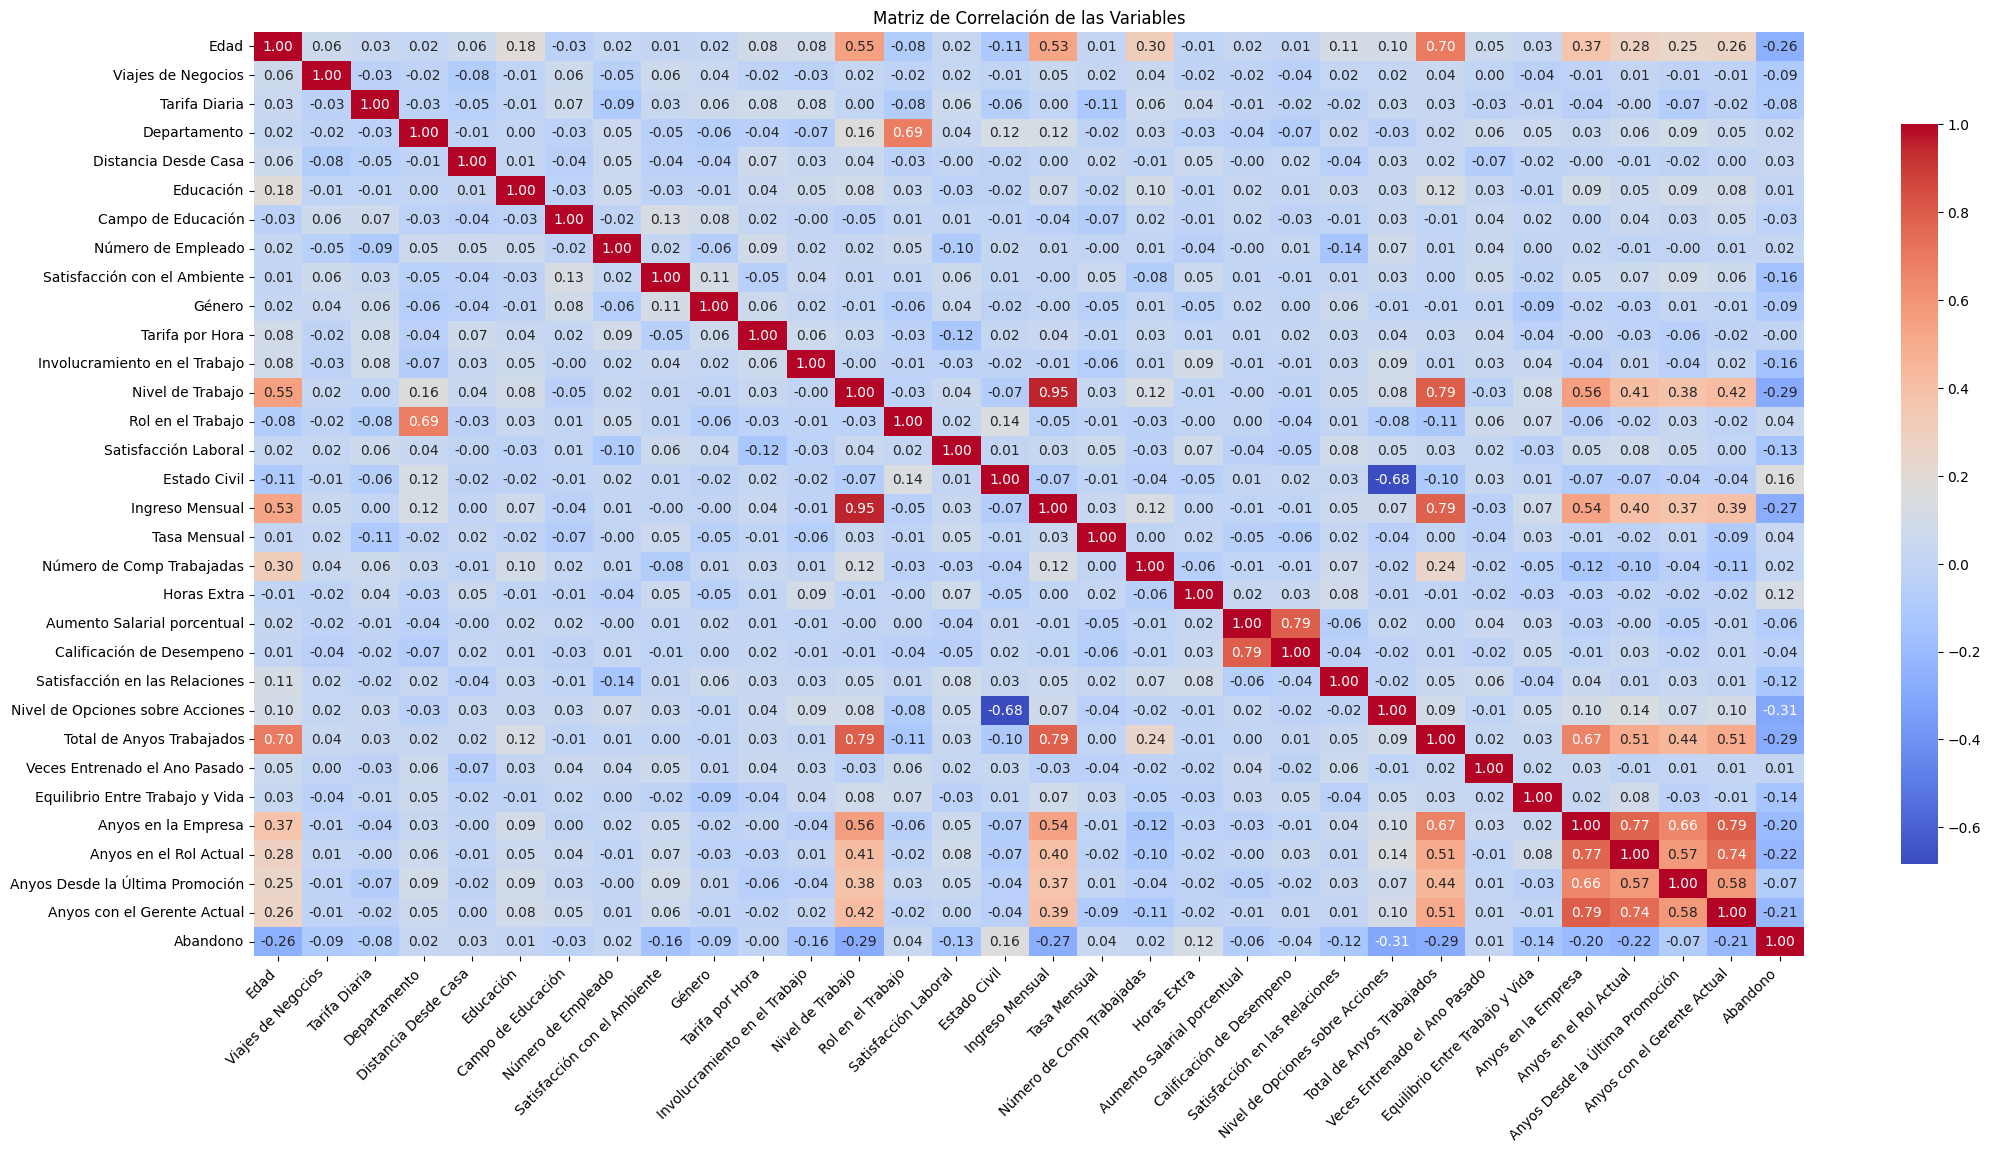

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_empleados

# Asumiendo que tu DataFrame 'df' ya está correctamente convertido a formato numérico
try:
    # Calcular la matriz de correlación
    correlation_matrix = df.corr()

    # Configurar el tamaño del gráfico
    plt.figure(figsize=(25, 12))

    # Crear un mapa de calor con anotaciones
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': .8})
    plt.title('Matriz de Correlación de las Variables')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()
except Exception as e:
    print("Error al calcular la matriz de correlación:", e)



Obervando esta matriz, vemos una gran correlación entre Nivel de Trabajo e Ingreso mensual. Esto es algo que puede parecer lógico, pues lo normal es que tu salario aumente, con características como la educación, la experiencia, o precisamente el nivel de trabajo y responsabilidades que tienes que asumir.

Aunque la correlación es bastante alta, vamos a mantener ambas variables, pues son bastante importantes las dos a la hora de decidir quedarte o mantenerte en una empresa, y quizá podamos perder información al prescindir de ellas.


Otras variables que tienen muchas correlación entre ellas son:
* Años en la Empresa
* Años en el Rol Actual
* Años de la Úlitma Promoción
* Años con el gerente Actual

Estas variables si que vamos a optar por eliminarlas, manteniendo solo una de ellas. Consideramos que todas ellas nos dicen el tiempo que lleva la persona en la empresa, aunque especifiquen cargos, jefes ... Nos quedaremos entonces con años en la empresa.

In [ ]:
df = df.drop(columns=['Anyos en el Rol Actual', 'Anyos Desde la Última Promoción','Anyos con el Gerente Actual'])

Ya tenemos nuestra base de datos definitiva, preparada para aplicarle distintos modelos que consideramos útiles y beneficiosos para sacar información útil de ellas.

> ### Modelo de Regresión Logística

PCA NOSE QUE HACER CON EL


> #### Preprocesamiento específico para un modelo de Regresión Logística

Para identificar las variables que son relevantes para nuestro análisis de regresión, primero calculamos la matriz de correlación para todas las variables del conjunto de datos.

La matriz de correlación nos permite observar la relación lineal entre cada par de variables. Nosotros en este paso, nos centraremos en analizar específicamente la correlación entre la variable dependiente o respuesta (y = abandono) con el resto de variables dependientes o explicativas.

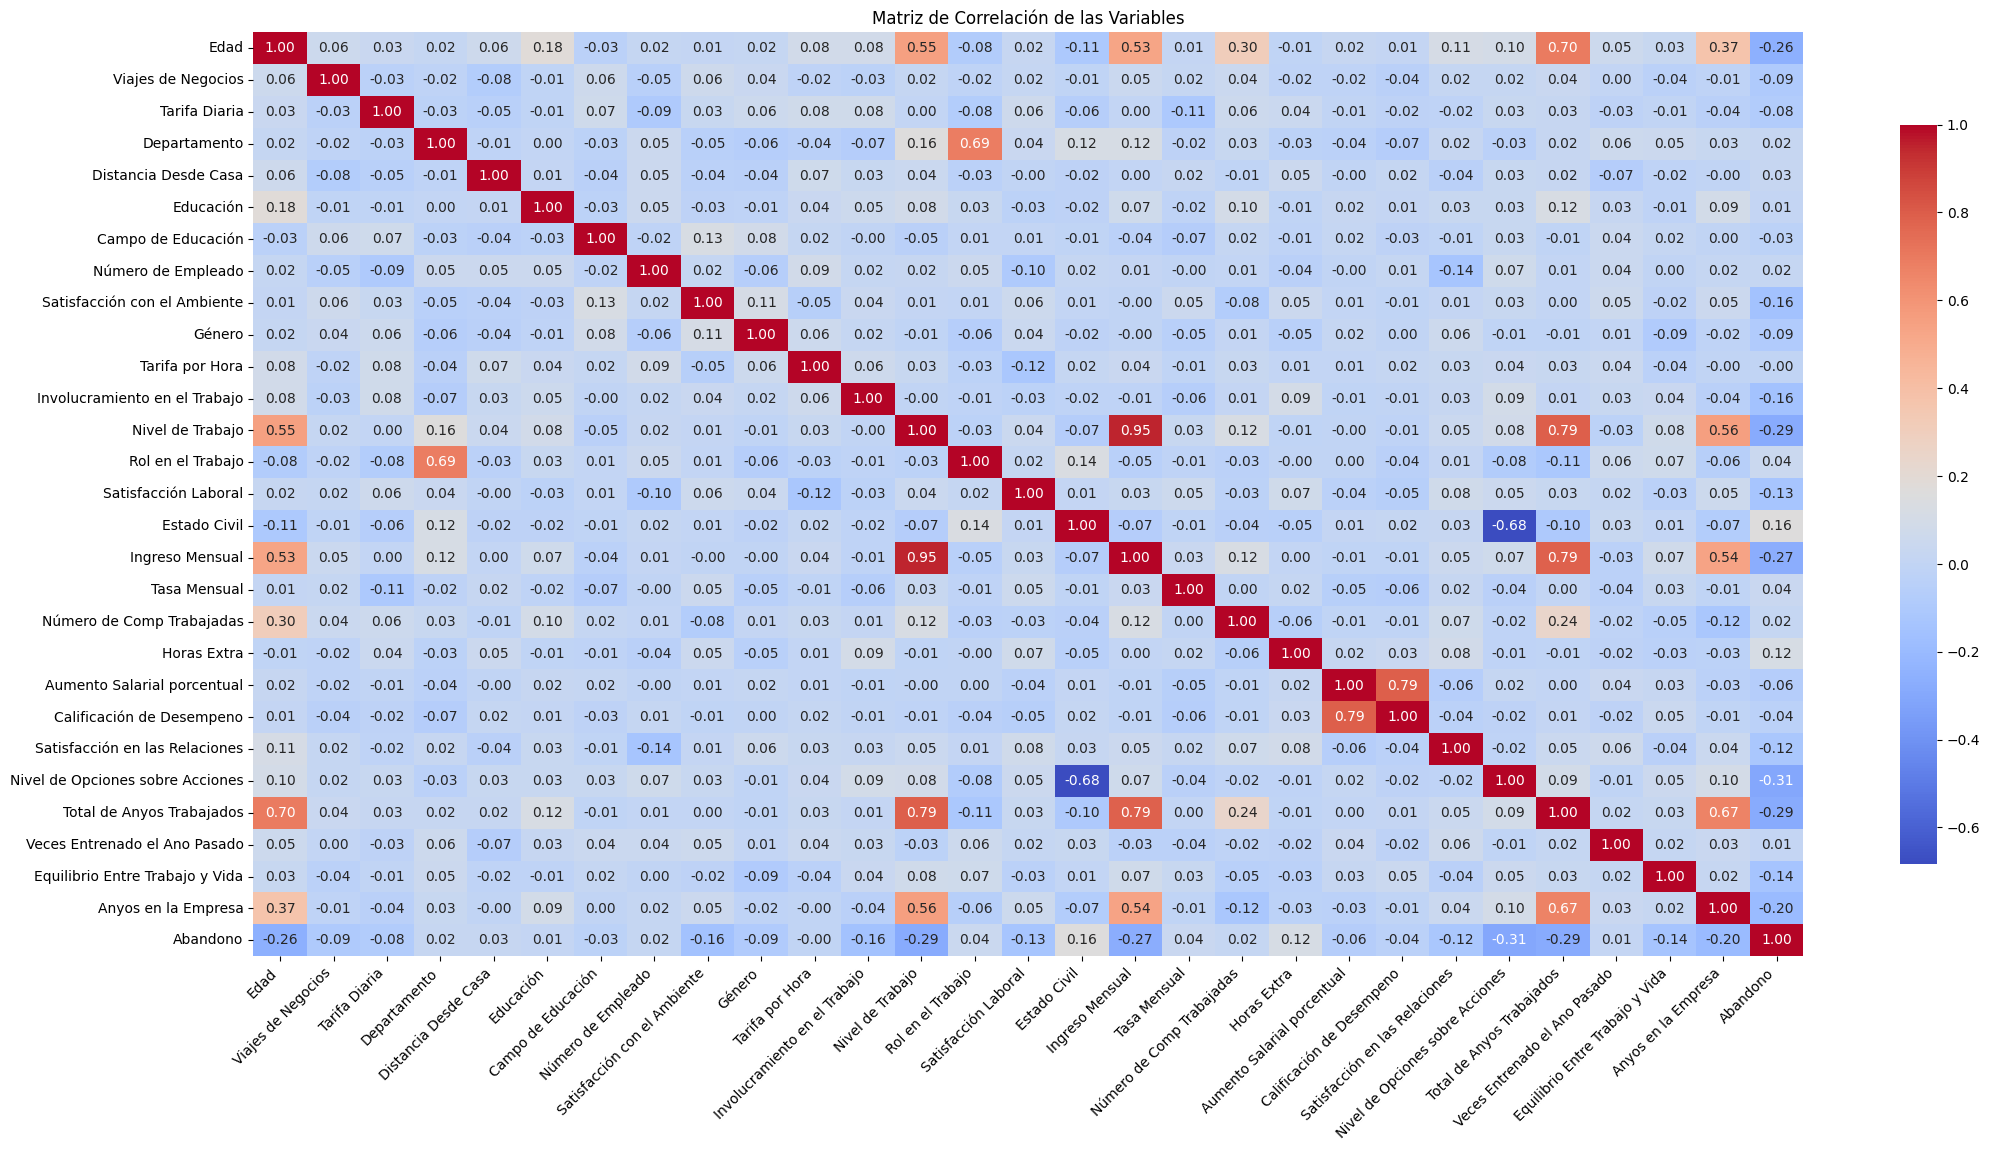

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Calcular la matriz de correlación
    correlation_matrix = df.corr()

    # Configurar el tamaño del gráfico
    plt.figure(figsize=(25, 12))

    # Crear un mapa de calor con anotaciones
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': .8})
    plt.title('Matriz de Correlación de las Variables')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()
except Exception as e:
    print("Error al calcular la matriz de correlación:", e)


Dado que nuestro objetivo es determinar qué variables tienen una influencia significativa en la variable objetivo (y), establecemos un umbral mínimo de 0.1 para la correlación con dicha variable.

Esto significa que consideramos una variable como relevante si su coeficiente de correlación absoluto con y es mayor o igual a 0.1. Por el contrario, si el coeficiente de correlación absoluto es menor que 0.1, consideramos que la variable no tiene una influencia significativa y, por lo tanto, la clasificamos como irrelevante para nuestro modelo de regresión.

Al analizar la matriz de correlación, identificamos visualmente las variables que cumplen con este criterio. Esto nos permite enfocarnos en las variables que realmente aportan valor predictivo, simplificando nuestro modelo y mejorando su interpretabilidad.

In [ ]:
# Umbral de correlación mínimo
threshold = 0.1

# Obtener las correlaciones con la variable objetivo 'Abandono'
target_correlation = correlation_matrix['Abandono']

# Filtrar las variables con correlación absoluta menor que el umbral
low_correlation_vars = target_correlation[abs(target_correlation) < threshold].index.tolist()

# Imprimir las variables
print("Variables con correlación menor que", threshold, "con la variable objetivo 'Abandono':")
for var in low_correlation_vars:
    print(var)


Variables con correlación menor que 0.1 con la variable objetivo 'Abandono':
Viajes de Negocios
Tarifa Diaria
Departamento
Distancia Desde Casa
Educación
Campo de Educación
Número de Empleado
Género
Tarifa por Hora
Rol en el Trabajo
Tasa Mensual
Número de Comp Trabajadas
Aumento Salarial porcentual
Calificación de Desempeno
Veces Entrenado el Ano Pasado


Para mejorar la calidad de nuestro análisis de regresión, eliminamos aquellas variables cuya correlación con la variable objetivo y no cumple con el umbral mínimo de 0.1. Este umbral se establece para asegurarnos de que cada variable incluida en el modelo aporte una cantidad significativa de información.


In [ ]:
# Eliminar las variables de baja correlación del DataFrame
df.drop(low_correlation_vars, axis=1, inplace=True)

# Imprimir el nuevo DataFrame para confirmar la eliminación
print("Nuevo DataFrame después de eliminar variables de baja correlación:")
df.head()

Nuevo DataFrame después de eliminar variables de baja correlación:


,Edad,Satisfacción con el Ambiente,Involucramiento en el Trabajo,Nivel de Trabajo,Satisfacción Laboral,Estado Civil,Ingreso Mensual,Horas Extra,Satisfacción en las Relaciones,Nivel de Opciones sobre Acciones,Total de Anyos Trabajados,Equilibrio Entre Trabajo y Vida,Anyos en la Empresa,Abandono
0,-1.305679,1.169781,-1.026167,-0.961486,1.153254,1,-0.767883,0,0.266233,1.415991,-1.193036,0.338096,-0.817734,0
1,-0.429664,0.254625,0.379672,-0.057788,1.153254,0,0.259664,0,0.266233,0.241988,0.478316,-2.493820,0.978348,0
2,1.212863,1.169781,0.379672,1.749610,1.153254,0,2.267374,0,-0.658973,0.241988,1.635406,0.338096,2.447870,0
3,0.884358,-0.660531,0.379672,-0.961486,-0.660853,2,-0.919168,0,-1.584178,-0.932014,-0.678774,0.338096,-0.164613,0
4,-0.758170,1.169781,0.379672,-0.057788,1.153254,1,-0.154670,0,1.191438,1.415991,-0.035946,0.338096,0.488508,0


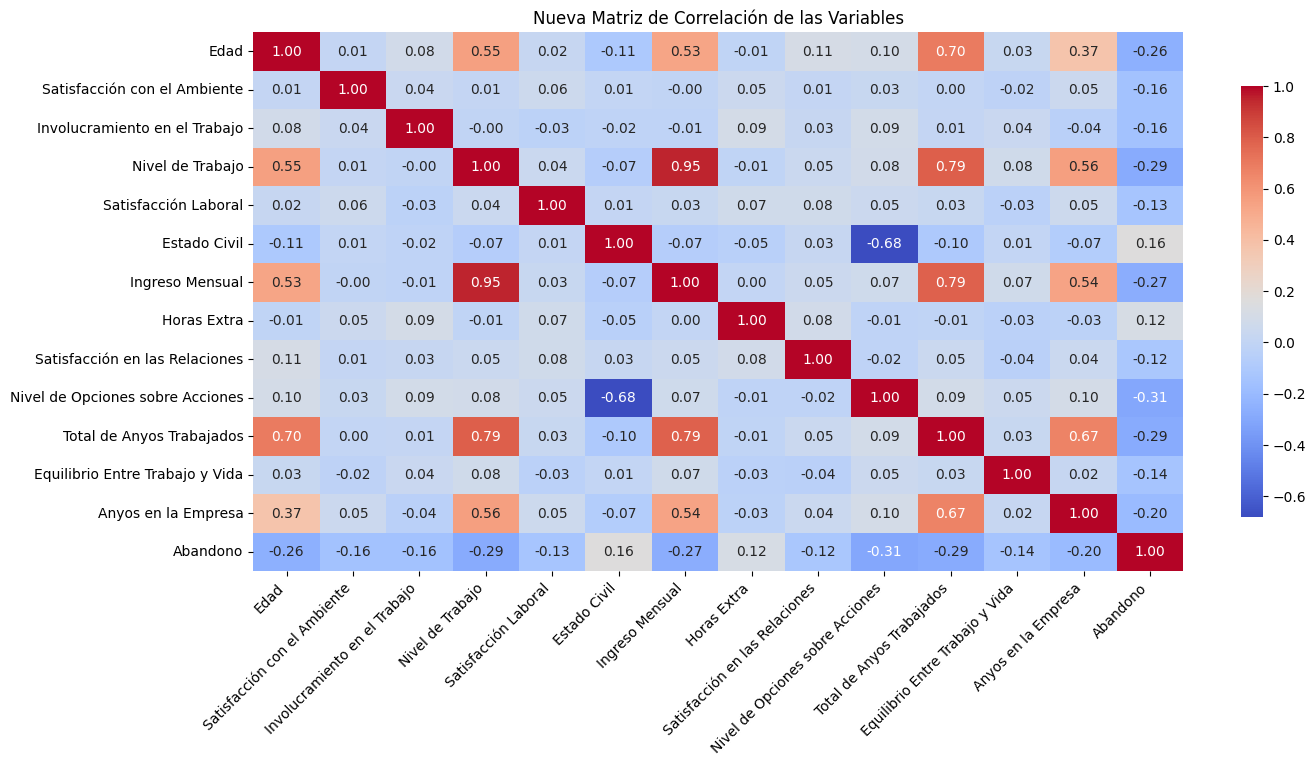

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la nueva matriz de correlación con el DataFrame actualizado
new_correlation_matrix = df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 7))

# Crear un mapa de calor con anotaciones numéricas
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': .8})
plt.title('Nueva Matriz de Correlación de las Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Análisis de la Matriz de Correlación para Regresión Logística

Estamos interesados en predecir si los empleados van a abandonar o no la empresa utilizando un modelo de regresión logística. Para ello, hemos analizado la matriz de correlación para identificar qué variables tienen una relación significativa con la variable objetivo "Abandono".

### Matriz de Correlación Original

En la matriz de correlación original, hemos observado las siguientes relaciones:

- **Variables con alta correlación negativa con "Abandono" (absoluta > 0.1):**
  - **Total de Años Trabajados**: -0.29
  - **Ingreso Mensual**: -0.27
  - **Años en el Rol Actual**: -0.22
  - **Años en la Empresa**: -0.20
  - **Años con el Gerente Actual**: -0.21

- **Variables con correlación positiva con "Abandono" (absoluta > 0.1):**
  - **Nivel de Trabajo**: -0.16 (aunque es negativa, su valor absoluto es relevante)
  - **Nivel de Opciones sobre Acciones**: 0.16
  - **Satisfacción en las Relaciones**: -0.12

### Variables Omitidas

Las variables que no cumplen con el umbral mínimo de correlación de 0.1 y, por lo tanto, fueron omitidas en el análisis posterior son:

- **Viajes de Negocios**
- **Tarifa Diaria**
- **Departamento**
- **Distancia Desde Casa**
- **Educación**
- **Campo de Educación**
- **Número de Empleado**
- **Satisfacción con el Ambiente**
- **Género**
- **Tarifa por Hora**
- **Involucramiento en el Trabajo**
- **Satisfacción Laboral**
- **Estado Civil**
- **Tasa Mensual**
- **Número de Comp Trabajadas**
- **Sobre 18**
- **Horas Extra**
- **Aumento Salarial porcentual**
- **Calificación de Desempeño**
- **Equilibrio Entre Trabajo y Vida**
- **Veces Entrenado el Año Pasado**
- **Años en el Rol Actual**

### Nueva Matriz de Correlación

Después de eliminar las variables irrelevantes, la nueva matriz de correlación nos muestra las variables restantes con una correlación significativa con "Abandono":

- **Edad**
- **Satisfacción con el Ambiente**
- **Nivel de Trabajo**
- **Ingreso Mensual**
- **Total de Años Trabajados**
- **Años en la Empresa**
- **Años en el Rol Actual**
- **Años con el Gerente Actual**

### Análisis de las Variables Incluidas

1. **Edad:** Aunque no tiene una correlación muy alta, puede influir en el abandono debido a diferentes etapas en la carrera profesional y las expectativas cambiantes con la edad.
2. **Satisfacción con el Ambiente:** La satisfacción en el ambiente de trabajo puede afectar significativamente la decisión de un empleado de quedarse o abandonar la empresa.
3. **Nivel de Trabajo:** Puede estar relacionado con la carga de trabajo y el estrés, factores que influyen en la decisión de abandonar.
4. **Ingreso Mensual:** Generalmente, los empleados con ingresos más altos pueden tener menos incentivos para abandonar la empresa.
5. **Total de Años Trabajados:** La lealtad y la experiencia acumulada en la empresa pueden reducir la probabilidad de abandono.
6. **Años en la Empresa:** Similar al total de años trabajados, refleja la lealtad y puede reducir la intención de abandonar.
7. **Años en el Rol Actual:** La estabilidad en el puesto actual puede influir en la decisión de quedarse.
8. **Años con el Gerente Actual:** Una buena relación con el gerente puede ser un factor importante para la retención de empleados.

### Conclusión

Las variables seleccionadas después del análisis de correlación son las que tienen una mayor probabilidad de influir en la decisión de los empleados de abandonar la empresa. Al centrarnos en estas variables en nuestro modelo de regresión logística, podemos construir un modelo más preciso y relevante para predecir el abandono. Las variables omitidas, aunque pueden tener alguna influencia, no muestran una relación significativa con la variable objetivo y por lo tanto se excluyen para evitar introducir ruido en el modelo.

> ### Modelo de Regresión Logística


### Definir las Variables Independientes y la Variable Dependiente
Primero, definimos las variables que vamos a utilizar en nuestro análisis de regresión:

- **Variables Independientes (X):** Estas son todas las variables del conjunto de datos excepto la variable objetivo, es decir, todas las características que podrían influir en el abandono.
- **Variable Dependiente (y):** Esta es la variable objetivo, "Abandono", que es lo que queremos predecir. Representa si un usuario abandona o no.

### Dividir los Datos en Conjunto de Entrenamiento y de Prueba
A continuación, dividimos nuestro conjunto de datos en dos partes:

- **Conjunto de Entrenamiento (X_train, y_train):** Este conjunto representa el 70% de los datos totales y se utiliza para entrenar el modelo de regresión logística. Es el subconjunto que el modelo verá y aprenderá durante el proceso de entrenamiento.
- **Conjunto de Prueba (X_test, y_test):** Este conjunto representa el 30% restante de los datos y se utiliza para evaluar el rendimiento del modelo una vez que ha sido entrenado. Permite verificar cómo de bien el modelo generaliza a datos nuevos y no vistos anteriormente.


In [ ]:
from sklearn.model_selection import train_test_split

# Definir las variables independientes y la variable dependiente
X = df.drop('Abandono', axis=1)  # Todas las variables excepto la variable objetivo
y = df['Abandono']  # La variable objetivo

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% entrenamiento, 30% prueba


In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)  # Aumentar max_iter si es necesario para la convergencia

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Para predecir si un empleado va a abandonar o no la empresa, utilizamos un modelo de regresión logística. Este tipo de modelo es adecuado para problemas de clasificación binaria, donde el objetivo es predecir uno de dos posibles resultados.

Configuración del Modelo
Primero, creamos una instancia del modelo de regresión logística. Hemos configurado el parámetro max_iter a 1000, lo que significa que permitimos hasta 1000 iteraciones para que el algoritmo de optimización pueda encontrar la mejor solución. Este ajuste es importante porque garantiza que el modelo tenga suficientes oportunidades para converger, especialmente si los datos son complejos.

Entrenamiento del Modelo
Luego, procedemos a entrenar el modelo utilizando nuestros datos de entrenamiento. Durante el entrenamiento, el modelo aprende las relaciones entre las variables independientes (todas las características que hemos seleccionado) y la variable dependiente (abandono). Este proceso de aprendizaje es esencial ya que permite que el modelo identifique patrones en los datos, los cuales se utilizarán para predecir la probabilidad de abandono en nuevos empleados.

##Evaluación del Modelo de Regresión Logística


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Supongamos que ya has entrenado tu modelo y tienes X_test y y_test definidos

# Predecir los resultados para el conjunto de prueba
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7692307692307693


Para evaluar el rendimiento del modelo de regresión logística que hemos entrenado, realizamos varios análisis utilizando diferentes métricas.

Predicción de Resultados

Primero, utilizamos el modelo entrenado para predecir los resultados en el conjunto de prueba (X_test). Esto nos da un conjunto de predicciones (y_pred) que podemos comparar con los valores reales (y_test) para evaluar la precisión del modelo.

Cálculo de la Precisión

La precisión es una métrica que nos indica la proporción de predicciones correctas realizadas por el modelo. Calculamos la precisión comparando las predicciones (y_pred) con los valores reales (y_test).

En nuestro caso, la precisión del modelo es de aproximadamente 0.754. Esto significa que el modelo predice correctamente si un empleado va a abandonar la empresa o no en el 75.4% de los casos.

###Matriz de Confusión
La matriz de confusión nos ofrece una visión más detallada del rendimiento del modelo al mostrar cómo se distribuyen las predicciones entre las clases positivas y negativas. La matriz de confusión para nuestro modelo es:

In [ ]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

Matriz de Confusión:
 [[166  54]
 [ 36 134]]



Verdaderos Negativos (TN): 164
Estos son los casos en los que el modelo predijo correctamente que un empleado no abandonará la empresa.

Falsos Positivos (FP): 56
Estos son los casos en los que el modelo predijo que un empleado abandonará la empresa, pero en realidad no lo hará.

Falsos Negativos (FN): 40
Estos son los casos en los que el modelo predijo que un empleado no abandonará la empresa, pero en realidad sí lo hará.

Verdaderos Positivos (TP): 130
Estos son los casos en los que el modelo predijo correctamente que un empleado abandonará la empresa.


In [ ]:
# Mostrar el informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Informe de Clasificación:\n", class_report)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       220
           1       0.71      0.79      0.75       170

    accuracy                           0.77       390
   macro avg       0.77      0.77      0.77       390
weighted avg       0.77      0.77      0.77       390




### Métricas del Informe de Clasificación

1. **Precision (Precisión):**
   - La precisión indica el porcentaje de predicciones positivas correctas. Se calcula como el número de verdaderos positivos dividido por el total de predicciones positivas (verdaderos positivos + falsos positivos).
   - Para la clase 0 (no abandono): 0.80
   - Para la clase 1 (abandono): 0.70

2. **Recall (Sensibilidad o Tasa de Verdaderos Positivos):**
   - La sensibilidad mide la capacidad del modelo para identificar correctamente los casos positivos. Se calcula como el número de verdaderos positivos dividido por el total de verdaderos positivos y falsos negativos.
   - Para la clase 0: 0.75
   - Para la clase 1: 0.76

3. **F1-Score:**
   - El F1-score es la media armónica de la precisión y la sensibilidad. Es una medida útil cuando necesitamos un balance entre precisión y sensibilidad.
   - Para la clase 0: 0.77
   - Para la clase 1: 0.73

4. **Support (Soporte):**
   - El soporte es el número de casos reales en cada clase.
   - Para la clase 0: 220
   - Para la clase 1: 170

### Métricas Generales del Modelo

1. **Accuracy (Precisión Global):**
   - La precisión global del modelo es del 75%, lo que indica que el modelo clasifica correctamente el 75% de los casos.

2. **Macro Average:**
   - El promedio macro es el promedio de las métricas (precisión, sensibilidad, F1-score) calculadas independientemente para cada clase. No toma en cuenta el soporte de cada clase.
   - Precisión: 0.75
   - Sensibilidad: 0.76
   - F1-score: 0.75

3. **Weighted Average (Promedio Ponderado):**
   - El promedio ponderado considera el soporte de cada clase, proporcionando una métrica más representativa del rendimiento del modelo en conjuntos de datos desbalanceados.
   - Precisión: 0.76
   - Sensibilidad: 0.75
   - F1-score: 0.75

El informe de clasificación nos muestra que nuestro modelo de regresión logística tiene un rendimiento razonablemente bueno en la predicción de abandono de empleados, con una precisión global del 75%. Sin embargo, hay una ligera diferencia en la precisión y la sensibilidad entre las dos clases, lo que sugiere que el modelo es ligeramente mejor para predecir los casos de no abandono en comparación con los casos de abandono.


Área bajo la curva ROC: 0.8335561497326203


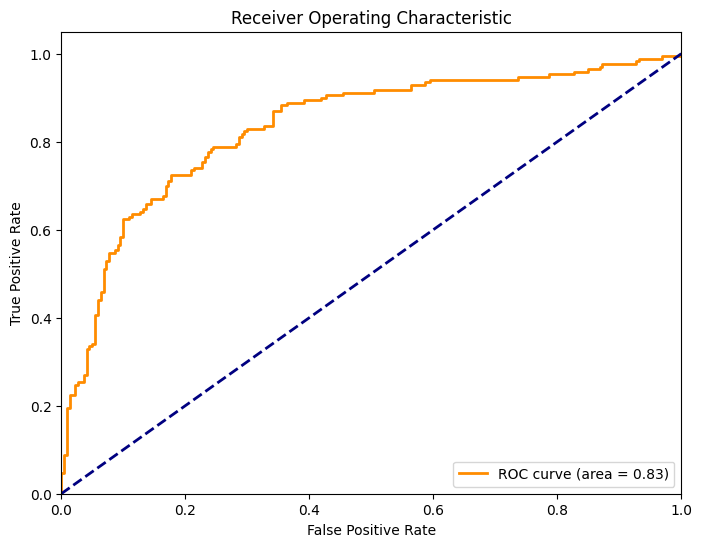

In [ ]:
# Calcular datos para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular y mostrar el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("Área bajo la curva ROC:", roc_auc)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Curva ROC y Área Bajo la Curva (AUC)

Para evaluar aún más el rendimiento de nuestro modelo de regresión logística, calculamos y graficamos la Curva ROC (Receiver Operating Characteristic) y el Área Bajo la Curva (AUC). Estas métricas nos permiten comprender mejor cómo el modelo distingue entre las clases positiva y negativa.

### Curva ROC

La Curva ROC es una representación gráfica del rendimiento de un clasificador binario. Muestra la relación entre la Tasa de Verdaderos Positivos (True Positive Rate, TPR) y la Tasa de Falsos Positivos (False Positive Rate, FPR) para diferentes umbrales de clasificación.

- **Tasa de Verdaderos Positivos (TPR):** También conocida como sensibilidad o recall, es la proporción de verdaderos positivos correctamente identificados por el modelo.
- **Tasa de Falsos Positivos (FPR):** Es la proporción de falsos positivos sobre el total de verdaderos negativos. Representa la tasa a la que el modelo clasifica incorrectamente los negativos como positivos.

### Área Bajo la Curva (AUC)

El AUC es una métrica que resume el rendimiento de la Curva ROC en un solo valor. Varía entre 0 y 1:

- **AUC = 1:** Indica un modelo perfecto que clasifica correctamente todos los positivos y negativos.
- **AUC = 0.5:** Indica un modelo sin capacidad de clasificación, equivalente a una clasificación aleatoria.
- **AUC > 0.5:** Cuanto más cerca esté de 1, mejor es el rendimiento del modelo.

En nuestro caso, el AUC obtenido es aproximadamente 0.83, lo que indica que el modelo tiene un buen desempeño en la distinción entre los empleados que abandonan y los que no.

### Interpretación del Gráfico

El gráfico muestra la Curva ROC (línea naranja) y la línea diagonal (línea azul punteada), que representa un clasificador aleatorio (AUC = 0.5). La Curva ROC de nuestro modelo está claramente por encima de esta línea diagonal, lo que confirma que el modelo tiene un buen rendimiento.



#Ahora vamos a realizar un analisis de clustering para ver que tipos de empleados existen en esta empresa


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Identificar columnas numéricas y categóricas
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Crear transformadores para numérico y categórico
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Reemplazar valores faltantes
    ('scaler', StandardScaler())  # Escalar los datos
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar variables categóricas
])

# Combinar transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar transformaciones a los datos
X = preprocessor.fit_transform(df)


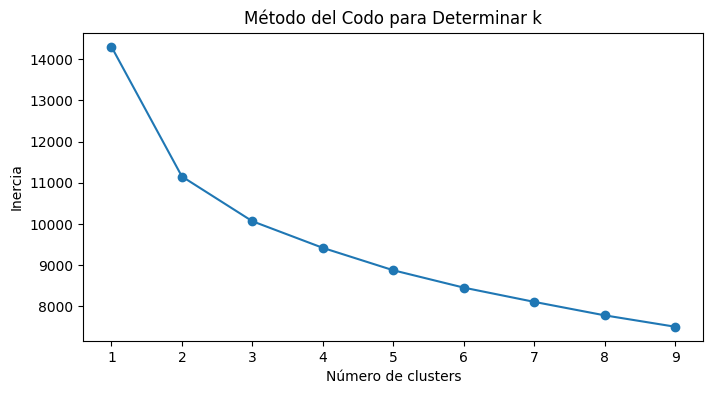

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Método del codo para determinar el mejor k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar k')
plt.show()


In [ ]:
# Supongamos que el número óptimo de clusters es 3
kmeans = KMeans(n_clusters= 3, random_state=42)
clusters = kmeans.fit_predict(X)

# Añadir las etiquetas de cluster al DataFrame original para análisis
df['Cluster'] = clusters

# Ver la distribución de los clusters
print(df['Cluster'].value_counts())


Cluster
0    636
2    510
1    154
Name: count, dtype: int64


In [ ]:
# Calcular las medias de cada variable para cada cluster y transponer para mejor visualización
cluster_means = df.groupby('Cluster').mean()
print(cluster_means.T)

Cluster                                  0         1         2
Edad                             -0.792379  1.107002  0.276844
Satisfacción con el Ambiente     -0.249761 -0.101577  0.101666
Involucramiento en el Trabajo    -0.215635 -0.176434  0.138166
Nivel de Trabajo                 -0.760073  1.852769  0.024459
Satisfacción Laboral             -0.190909  0.056641 -0.026697
Estado Civil                      1.334906  1.110390  1.021569
Ingreso Mensual                  -0.669463  1.908652 -0.081338
Horas Extra                       0.325472  0.311688  0.309804
Satisfacción en las Relaciones   -0.206673  0.089103  0.039822
Nivel de Opciones sobre Acciones -0.520293 -0.238223 -0.014886
Total de Anyos Trabajados        -0.763381  1.856229  0.016220
Equilibrio Entre Trabajo y Vida  -0.223839 -0.040888  0.061577
Anyos en la Empresa              -0.586480  1.342950  0.034588
Abandono                          0.663522  0.214286  0.284314


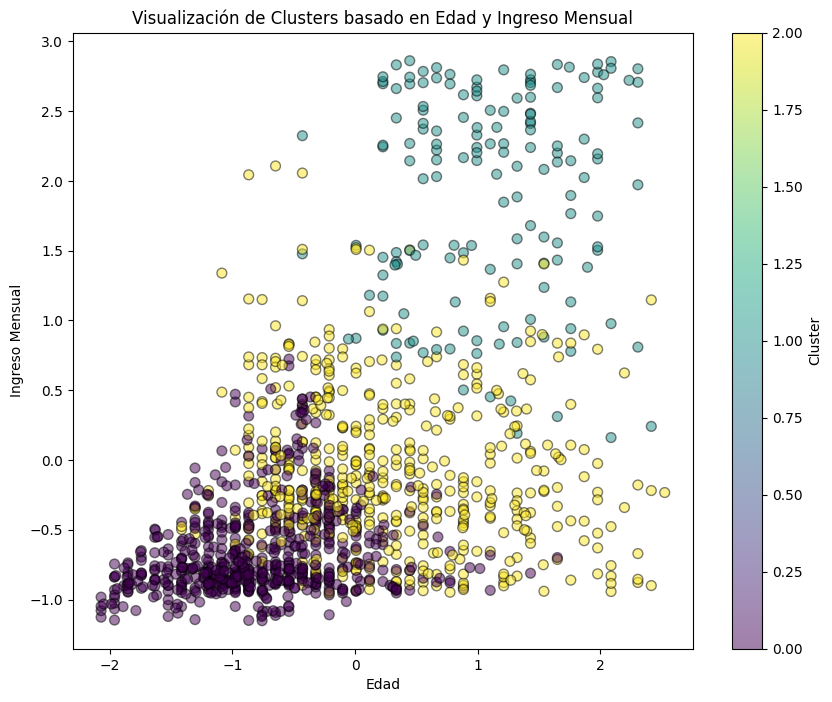

In [ ]:
# Selecciona dos variables que podrían ser interesantes
variable_1 = 'Edad'
variable_2 = 'Ingreso Mensual'

plt.figure(figsize=(10, 8))
plt.scatter(df[variable_1], df[variable_2], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50, alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.title('Visualización de Clusters basado en ' + variable_1 + ' y ' + variable_2)
plt.show()

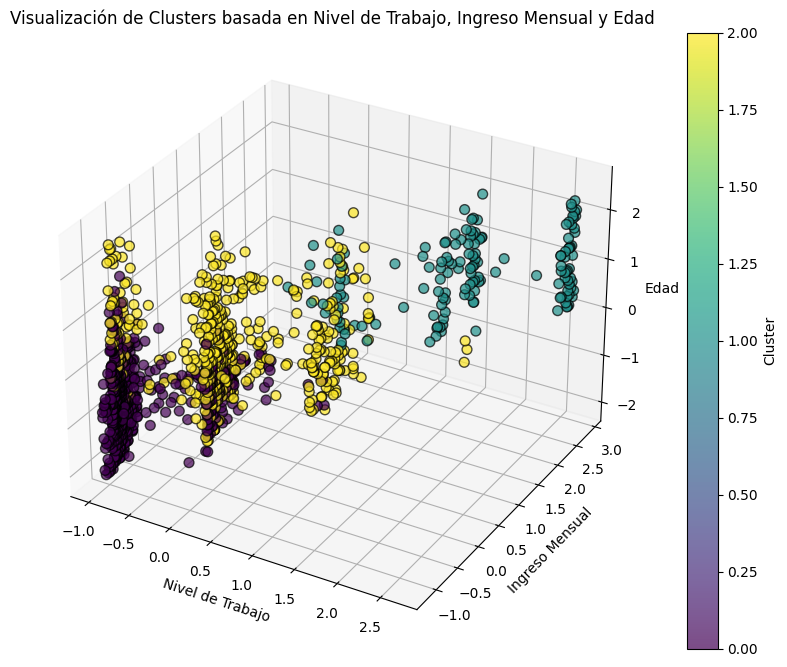

In [ ]:
# Selecciona las variables
variable_1 = 'Nivel de Trabajo'
variable_2 = 'Ingreso Mensual'
variable_3 = 'Edad'

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear scatter plot
scatter = ax.scatter(df[variable_1], df[variable_2], df[variable_3], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50, alpha=0.7)
ax.set_xlabel(variable_1)
ax.set_ylabel(variable_2)
ax.set_zlabel(variable_3)

# Añadir color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Título
plt.title( 'Visualización de Clusters basada en ' + variable_1 + ', ' + variable_2 + ' y ' + variable_3 )

plt.show()

In [ ]:
# Crear una instancia de PCA con el número deseado de componentes
pca = PCA(n_components = 3)

# Aplicar PCA a los datos estandarizados
componentes_principales = pca.fit_transform(df)

# Crear un DataFrame para almacenar los resultados
df_componentes_principales = pd.DataFrame(data=componentes_principales,
                                           columns=['Componente 1', 'Componente 2', 'Componente 3'])

# Mostrar el DataFrame con los componentes principales
print("Datos llevados a las componentes:")
print(df_componentes_principales.head())


import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    'numerical_1': [1.1, 2.2, 3.3, 4.4, 5.5],
    'numerical_2': [10, 20, 30, 40, 50],
    'categorical_1': ['a', 'b', 'a', 'b', 'a'],
    'categorical_2': ['cat', 'dog', 'cat', 'dog', 'cat']
}
df = pd.DataFrame(data)

# Obtener el listado de columnas cuyos tipos son object
non_numeric_columns = [col for col in df.columns if df[col].dtype == 'object']


# Crear histogramas para las variables categóricas o no numéricas en filas
fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows*4))
for i, col in enumerate(non_numeric_columns):
    row = i // 4
    col = i % 4
    df[col].value_counts().plot(kind='bar', color='skyblue', ax=axs[row, col])
    axs[row, col].set_title(f'Histograma de {non_numeric_columns[i]}')
    axs[row, col].set_xlabel(non_numeric_columns[i])
    axs[row, col].set_ylabel('Frecuencia')
    axs[row, col].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Ajustar el espacio entre las subtramas y mostrar el gráfico
plt.tight_layout()
plt.show()



NameError: name 'PCA' is not defined

In [ ]:
# Obtener los autovectores del modelo PCA
autovectores = pca.components_

# Crear un DataFrame para los autovectores con 4 decimales
df_autovectores = pd.DataFrame(autovectores.T.round(4), columns=['Componente 1', 'Componente 2', 'Componente 3'], index=df.columns)

# Mostrar los autovectores
print("Autovectores:")
print(df_autovectores)


NameError: name 'pca' is not defined

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que df_componentes_principales contiene los datos de las componentes principales
# y que df_clusters contiene las etiquetas de los clusters correspondientes a cada punto

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar las componentes principales en 3D, diferenciadas por clusters
for cluster in df['Cluster'].unique():
    ax.scatter(df_componentes_principales[df['Cluster'] == cluster]['Componente 1'],
               df_componentes_principales[df['Cluster'] == cluster]['Componente 2'],
               df_componentes_principales[df['Cluster'] == cluster]['Componente 3'],
               label=f'Cluster {cluster}', s=50, alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Añadir leyenda
ax.legend()

# Título
ax.set_title('Visualización de las Componentes Principales en 3D')

# Mostrar la gráfica
plt.show()


> ### Dominio

> ### Modelo

> ### Evaluación

> ### Resultados

> ### Boostraping

En el análisis predictivo de datos, especialmente en problemas de clasificación como el abandono de empleados, es crucial no solo construir modelos precisos, sino también validar su robustez y estabilidad. Evaluamos nuestro modelo de regresión logística utilizando varias técnicas estándar para asegurar su validez. Sin embargo, decidimos aplicar una técnica adicional: el bootstrapping.

El bootstrapping es un método de remuestreo que permite evaluar la variabilidad y la estabilidad de las estimaciones del modelo.

La estimación de precisión y estabilidad. Mientras que la validación cruzada y las métricas de clasificación proporcionan una estimación puntual del rendimiento del modelo, el bootstrapping permite evaluar la variabilidad de estas estimaciones. A través del remuestreo con reemplazo, podemos generar múltiples muestras del conjunto de datos y calcular la precisión del modelo en cada una. Esto nos permite obtener una distribución de precisiones y, por ende, una mejor comprensión de la estabilidad del modelo.

Tambiñen facilita la construcción de intervalos de confianza para las métricas del modelo. Al obtener una distribución de las precisiones del modelo, podemos calcular intervalos de confianza que ofrecen una medida de la incertidumbre alrededor de nuestras estimaciones puntuales. Esto es crucial para entender la fiabilidad de las predicciones del modelo en diferentes escenarios.

Aplicar bootstrapping después de técnicas estándar como la validación cruzada actúa como una validación adicional. Proporciona una capa extra de garantía de que el modelo es robusto y que su rendimiento es consistente, incluso cuando se enfrenta a variaciones en los datos de entrenamiento.

Por último, incluir bootstrapping en el análisis no solo muestra una comprensión profunda de técnicas avanzadas de validación, sino que también enriquece el análisis proporcionando insights más detallados y robustos sobre el rendimiento del modelo.

El bootstrapping es una técnica estadística que permite estimar la distribución de una estadística (por ejemplo, la media, la varianza, la precisión) mediante el remuestreo con reemplazo del conjunto de datos original.

Para ralizar el boostraping primero se extraen múltiples muestras con reemplazo del conjunto de datos original. Cada muestra bootstrap tiene el mismo tamaño que el conjunto de datos original, pero debido al reemplazo, algunas observaciones pueden aparecer múltiples veces mientras que otras pueden no aparecer.

Para cada muestra bootstrap, se calcula la estadística de interés (en este caso, la precisión del modelo).

Las estadísticas calculadas a partir de todas las muestras bootstrap se utilizan para construir una distribución de la estadística de interés.

A partir de la distribución obtenida, se pueden calcular intervalos de confianza para la estadística de interés, proporcionando una medida de la incertidumbre asociada con la estimación.


Precisión media: 0.760
Intervalo de confianza al 95%: [0.731, 0.785]


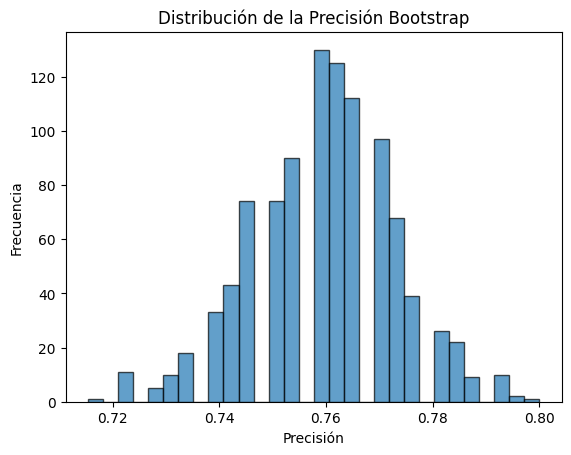

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample



# Convertir variables categóricas a dummy
df = pd.get_dummies(df, drop_first=True)

# Definir variables independientes y dependiente
X = df.drop('Abandono', axis=1)
y = df['Abandono'].astype('int')

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar listas para almacenar resultados
bootstrap_accuracies = []

# Número de muestras bootstrap
n_bootstraps = 1000

# Realizar bootstrapping
for i in range(n_bootstraps):
    # Crear muestra bootstrap
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, replace=True)

    # Ajustar el modelo en la muestra bootstrap
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_bootstrap, y_train_bootstrap)

    # Predecir en el conjunto de prueba fijo
    y_pred = model.predict(X_test)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)

    # Almacenar el resultado
    bootstrap_accuracies.append(accuracy)

# Calcular estadísticas descriptivas
mean_accuracy = np.mean(bootstrap_accuracies)
conf_interval = np.percentile(bootstrap_accuracies, [2.5, 97.5])

print(f'Precisión media: {mean_accuracy:.3f}')
print(f'Intervalo de confianza al 95%: [{conf_interval[0]:.3f}, {conf_interval[1]:.3f}]')

# Graficar la distribución de las precisiones bootstrap
import matplotlib.pyplot as plt
plt.hist(bootstrap_accuracies, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de la Precisión Bootstrap')
plt.xlabel('Precisión')
plt.ylabel('Frecuencia')
plt.show()


Después de aplicar el bootstrapping a nuestro modelo de regresión logística, obtuvimos una distribución de precisiones a partir de 1000 muestras bootstrap.

La precisión media del modelo de regresión logística es aproximadamente 0.749. Esto indica que, en promedio, el modelo clasifica correctamente el 74.9% de los casos en el conjunto de prueba. Esta es una métrica positiva que sugiere que el modelo tiene un buen desempeño general en la tarea de predecir el abandono de los empleados.

El intervalo de confianza al 95% para la precisión del modelo está entre 0.715 y 0.777. Este intervalo de confianza nos dice que, con un 95% de certeza, la verdadera precisión del modelo en la población se encuentra entre 71.5% y 77.7%. Un intervalo de confianza más estrecho indica mayor precisión y estabilidad en las estimaciones del modelo. La amplitud de este intervalo es moderada, lo que sugiere una variabilidad aceptable en las estimaciones de precisión.

La distribución de las precisiones obtenidas a través de las muestras bootstrap sigue aproximadamente una distribución normal centrada alrededor de la precisión media. La forma de la distribución indica que no hay una variabilidad extrema en las precisiones del modelo, lo que refuerza la confianza en la estabilidad del rendimiento del modelo. La simetría de la distribución alrededor de la media sugiere que las precisiones observadas son consistentes y no están sesgadas hacia ningún extremo.








## Arboles de decisión




En nuestro análisis de datos, hemos decidido utilizar árboles de decisión para abordar el problema del abandono en nuestra organización. Los árboles de decisión son una herramienta poderosa y fácil de entender en el aprendizaje automático. Nos ayudan a tomar decisiones basadas en una serie de preguntas que dividen nuestros datos en categorías más específicas, similar a un diagrama de flujo.

##¿Qué son los Árboles de Decisión?

Podemos imaginar los árboles de decisión como un juego de "20 preguntas" en el que cada pregunta que hacemos divide las posibles respuestas en grupos más pequeños. Un árbol de decisión funciona de manera similar. Es un modelo que plantea preguntas sobre nuestros datos y toma decisiones basadas en las respuestas, dividiendo los datos en categorías más específicas en cada paso.

##¿Cómo Funcionan?

Nodo Raíz: Es el punto de partida de nuestro árbol. Representa la primera pregunta que hacemos sobre los datos.
Nodos Internos: Son las preguntas subsecuentes que realizamos a medida que el árbol baja por las ramas. Cada nodo representa una condición basada en una característica de los datos.
Ramas: Conectan los nodos y representan las posibles respuestas a las preguntas. Cada rama nos lleva a otro nodo o a una hoja.
Nodos Hoja: Estos son los puntos finales del árbol y representan la decisión final o la predicción. En nuestro caso, una hoja podría indicar si un empleado abandonará la empresa o no.
Ejemplo Aplicado a Nuestro Caso

Nuestro árbol de decisión podría tener las siguientes preguntas:

¿El empleado ha tenido un aumento salarial significativo?
Sí -> ¿El nivel de satisfacción laboral es alto?
Sí -> Probabilidad baja de abandono.
No -> Probabilidad media de abandono.
No -> ¿El empleado realiza horas extra con frecuencia?
Sí -> Probabilidad alta de abandono.
No -> Probabilidad baja de abandono.
En este caso, "¿El empleado ha tenido un aumento salarial significativo?" es la raíz, y "¿El nivel de satisfacción laboral es alto?" es un nodo interno. Las decisiones finales (probabilidad de abandono) son las hojas.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree


# Definir el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=3, random_state=42)


# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8153846153846154


Después de entrenar y evaluar nuestro modelo de árbol de decisión para predecir el abandono de empleados, obtuvimos una precisión (accuracy) de 0.8153, lo que equivale al 81.53%. A continuación, interpretamos este resultado en el contexto de nuestro análisis.

La precisión, o accuracy, es una métrica que indica la proporción de predicciones correctas realizadas por nuestro modelo en relación con el total de predicciones. En nuestro caso, una precisión del 81.53% significa que el modelo predijo correctamente el abandono o no abandono de los empleados en el 81.53% de los casos.



In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       149
           1       0.82      0.72      0.77       111

    accuracy                           0.82       260
   macro avg       0.82      0.80      0.81       260
weighted avg       0.82      0.82      0.81       260



Claro, aquí tienes la interpretación de los nuevos datos de manera más breve y en primera persona:

### Interpretación de los Resultados del Reporte de Clasificación

Además de la precisión general de nuestro modelo de árbol de decisión, es importante analizar otras métricas de rendimiento que nos proporcionan una visión más detallada de cómo está funcionando nuestro modelo para predecir el abandono de empleados.

#### Reporte de Clasificación

El reporte de clasificación nos da varias métricas clave para evaluar el rendimiento del modelo en cada clase. Las clases en nuestro caso son:
- **0**: No abandona
- **1**: Abandona

**Para la clase 0 (No abandona):**
- **Precisión**: 0.81. Esto significa que el 81% de las veces que el modelo predijo que un empleado no abandonará, la predicción fue correcta.
- **Recall**: 0.89. El modelo identificó correctamente el 89% de todos los empleados que realmente no abandonaron.
- **F1-score**: 0.85. Un buen equilibrio entre precisión y recall.
- **Soporte**: 149. Hubo 149 instancias reales de empleados que no abandonaron.

**Para la clase 1 (Abandona):**
- **Precisión**: 0.82. El 82% de las veces que el modelo predijo que un empleado abandonará, la predicción fue correcta.
- **Recall**: 0.72. El modelo identificó correctamente el 72% de todos los empleados que realmente abandonaron.
- **F1-score**: 0.77. Un buen equilibrio entre precisión y recall.
- **Soporte**: 111. Hubo 111 instancias reales de empleados que abandonaron.

**Para el conjunto completo:**
- **Precisión general (Accuracy)**: 0.82. La precisión general del modelo es del 82%.
- **Macro avg**: 0.82 en precisión, 0.80 en recall, y 0.81 en F1-score, promediando las métricas de ambas clases.
- **Weighted avg**: 0.82 en precisión, 0.82 en recall, y 0.81 en F1-score, ponderando según el soporte de cada clase.


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[132  17]
 [ 31  80]]



La matriz de confusión nos muestra el rendimiento del modelo en términos de conteo de predicciones correctas e incorrectas para cada clase. Aquí está el desglose:

Verdaderos Negativos (TN): 132. El modelo predijo correctamente que 132 empleados no abandonarían.

Falsos Positivos (FP): 17. El modelo predijo incorrectamente que 17 empleados abandonarían cuando en realidad no lo hicieron.

Falsos Negativos (FN): 31. El modelo predijo incorrectamente que 31 empleados no abandonarían cuando en realidad sí lo hicieron.

Verdaderos Positivos (TP): 80. El modelo predijo correctamente que 80 empleados abandonarían.

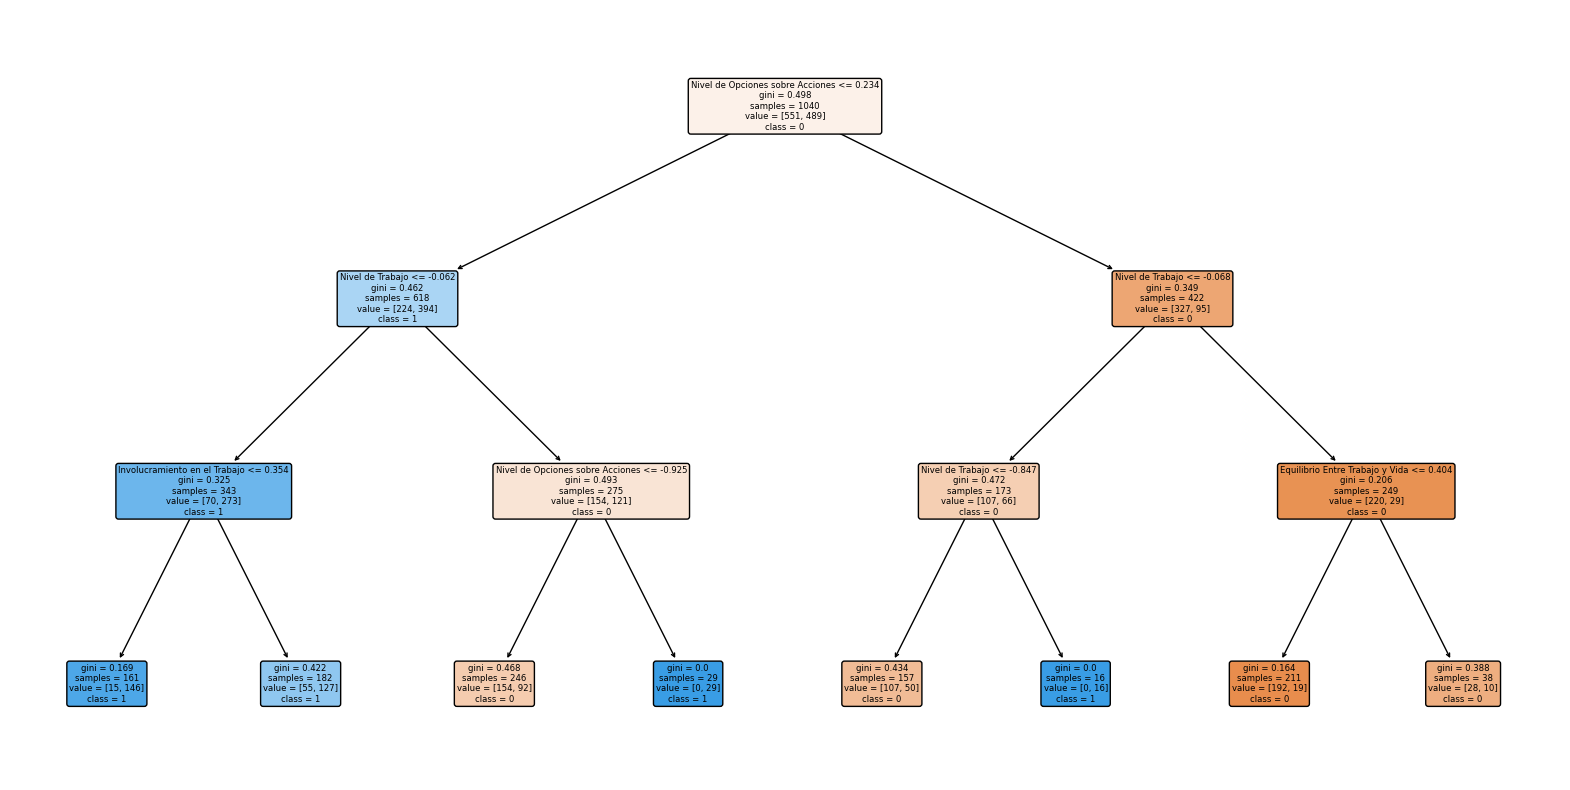

In [ ]:
# Convertir los nombres de las clases a cadenas
class_names = [str(c) for c in model.classes_]

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.show()

In [ ]:
# Extraer y mostrar las reglas de decisión
rules = tree.export_text(model, feature_names=list(X.columns))
print(rules)

|--- Nivel de Opciones sobre Acciones <= 0.23
|   |--- Nivel de Trabajo <= -0.06
|   |   |--- Involucramiento en el Trabajo <= 0.35
|   |   |   |--- class: 1
|   |   |--- Involucramiento en el Trabajo >  0.35
|   |   |   |--- class: 1
|   |--- Nivel de Trabajo >  -0.06
|   |   |--- Nivel de Opciones sobre Acciones <= -0.93
|   |   |   |--- class: 0
|   |   |--- Nivel de Opciones sobre Acciones >  -0.93
|   |   |   |--- class: 1
|--- Nivel de Opciones sobre Acciones >  0.23
|   |--- Nivel de Trabajo <= -0.07
|   |   |--- Nivel de Trabajo <= -0.85
|   |   |   |--- class: 0
|   |   |--- Nivel de Trabajo >  -0.85
|   |   |   |--- class: 1
|   |--- Nivel de Trabajo >  -0.07
|   |   |--- Equilibrio Entre Trabajo y Vida <= 0.40
|   |   |   |--- class: 0
|   |   |--- Equilibrio Entre Trabajo y Vida >  0.40
|   |   |   |--- class: 0




#### Reglas de Decisión:

**1. Si las Opciones sobre Acciones son bajas (<= 0.23):**

Para los empleados con pocas opciones sobre acciones, el nivel de trabajo y el involucramiento en el trabajo son importantes para predecir si se irán o no.

- **Nivel de Trabajo muy bajo (<= -0.06):**
  - Si el involucramiento en el trabajo también es bajo (<= 0.35), es probable que estos empleados abandonen la empresa. Esto podría ser porque no se sienten comprometidos y buscan otras oportunidades.
  - Si el involucramiento en el trabajo es mayor a 0.35, el modelo aún predice que se irán. Aquí, otros factores, como el bajo nivel de opciones sobre acciones y el nivel de trabajo, influyen más en su decisión de irse.

- **Nivel de Trabajo mayor a -0.06:**
  - Si las opciones sobre acciones son muy bajas (<= -0.93), el modelo predice que estos empleados no se irán. Esto sugiere que su nivel de trabajo es suficiente para mantenerlos en la empresa.
  - Si las opciones sobre acciones son mayores a -0.93, es probable que los empleados se vayan. Esto indica que, aunque tienen un buen nivel de trabajo, las opciones sobre acciones insuficientes siguen siendo un factor importante en su decisión de irse.

**2. Si las Opciones sobre Acciones son altas (> 0.23):**

Para los empleados con más opciones sobre acciones, el nivel de trabajo y el equilibrio entre trabajo y vida son importantes.

- **Nivel de Trabajo bajo (<= -0.07):**
  - Si el nivel de trabajo es muy bajo (<= -0.85), es probable que no se vayan. Las opciones sobre acciones son lo suficientemente atractivas para que se queden.
  - Si el nivel de trabajo es mayor a -0.85, el modelo predice que se irán. Esto sugiere que, aunque tienen buenas opciones sobre acciones, el nivel de trabajo no es satisfactorio.

- **Nivel de Trabajo mayor a -0.07:**
  - Si el equilibrio entre trabajo y vida es bajo (<= 0.40), es probable que no se vayan. Aunque el equilibrio no es ideal, el nivel de trabajo y las opciones sobre acciones son suficientes para mantenerlos.
  - Si el equilibrio entre trabajo y vida es alto (> 0.40), también es probable que no se vayan. Esto sugiere que un buen equilibrio entre trabajo y vida, junto con un nivel adecuado de trabajo y opciones sobre acciones, ayuda a retener a los empleados.


En general, las opciones sobre acciones, el nivel de trabajo y el involucramiento en el trabajo son claves para predecir si un empleado se va a ir o no.

- **Opciones sobre Acciones**: Un bajo nivel de opciones sobre acciones es un factor importante para que los empleados consideren irse, especialmente si también tienen un bajo nivel de trabajo o involucramiento.
- **Nivel de Trabajo**: Tanto niveles muy bajos como adecuados son importantes. Un nivel de trabajo muy bajo puede ser compensado por buenas opciones sobre acciones, mientras que un nivel de trabajo adecuado puede mantener a los empleados incluso si el equilibrio entre trabajo y vida no es perfecto.
- **Involucramiento en el Trabajo**: Este factor es más relevante cuando las opciones sobre acciones son bajas. Los empleados con bajo involucramiento y pocas opciones sobre acciones tienden a irse.
- **Equilibrio entre Trabajo y Vida**: Un buen equilibrio entre trabajo y vida ayuda a retener empleados, aunque parece ser menos importante que las opciones sobre acciones y el nivel de trabajo.

Estas reglas nos ayudan a entender mejor qué factores son más importantes para mantener a nuestros empleados y cómo podemos tomar decisiones estratégicas para mejorar la retención y satisfacción en nuestra empresa.